In [1]:
%matplotlib inline
from __future__ import unicode_literals
import csv
import json
import matplotlib.pyplot as plt
import pandas as pd
from dallinger.experiments import Griduniverse
from dlgr.griduniverse.experiment import Gridworld

ROWS = 40
COLS = 40
# We need to increase the CSV field size to successfully load GU experiment
# data with a large grid
ORIG_CSV_LIMIT = csv.field_size_limit(ROWS*COLS*1024)

BASE_ID = "b0d3daa{}-f7ed-43fa-ad6b-9928aa51f8e1"
PARTICIPANTS = 6

# Repeat for each group counts into which we can divide participants
GROUP_COUNTS = [n for n in range(1, len(Gridworld.player_colors) + 1)
                if PARTICIPANTS % n == 0 and n != PARTICIPANTS]

PLOT_VARS = ["average_score", "average_payoff"]
print "Running with {} participants and group counts {}".format(
    PARTICIPANTS, GROUP_COUNTS
)

Running with 6 participants and group counts [1, 2, 3]


In [2]:
EXP_CONFIG = {
    "mode": "live",
    "max_participants": PARTICIPANTS,
    "num_recruits": PARTICIPANTS*3,
    "num_colors": 1,
    "time_per_round": 60.0,
    "num_rounds": 2,
    "num_food": ROWS * COLS / 100,
    "walls_density": 0.50,
    "walls_contiguity": 0.90,
    "block_size": 12,
    "rows": ROWS,
    "columns": COLS,
    "window_rows": 20,
    "window_columns": 20,
    "use_identicons": True,
    "visibility": 7,
    "show_chatroom": True,
    "spatial_chat": False,
    "chat_visibility_threshold": 0.3,
    "intergroup_competition": 20.0,
    "intragroup_competition": 0.0,
    "leaderboard_group": True,
    "leaderboard_time": 3,
    "food_probability_distribution": "sinusoidal 15",
}

In [3]:
exp = Griduniverse()
exp.verbose = False
data = []

In [4]:
for count in GROUP_COUNTS:
    exp_id = BASE_ID.format(count)
    config = EXP_CONFIG.copy()
    
    config["num_colors"] = count
    data.append(exp.collect(exp_id, exp_config=config))

In [5]:
graph_data = [(count, json.loads(exp.analyze(data[i])))
              for i, count in enumerate(GROUP_COUNTS)]

In [6]:
df = pd.DataFrame([[d[1][v] for v in PLOT_VARS] for d in graph_data],
                  index=[d[0] for d in graph_data],
                  columns=PLOT_VARS)

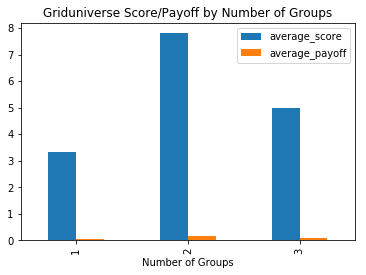

In [7]:
axes = df.plot(kind="bar", title="Griduniverse Score/Payoff by Number of Groups")
label = axes.set_xlabel("Number of Groups")